## Setup

In [1]:
topology = 'B'
omission = 'omitIntMet'
ablation = 25

In [2]:
from scipy.stats import f_oneway
from scipy.stats import kruskal

import pandas as pd
import numpy as np
import tellurium as te

import random

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from statsmodels.multivariate.manova import MANOVA

import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import os

import gzip
import cloudpickle

In [3]:
os.chdir('..')
from src import antemll, util
os.chdir('notebooks')

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
ant_1 ='../models/Antimony/topologyB-noReg.ant' 
rr_1 = te.loada(ant_1)
rr_1.conservedMoietyAnalysis = True
rr_1.steadyState()
gt_1 = rr_1.getScaledElasticityMatrix().ravel()

In [5]:
pt_labels = ['0.5x', '1.5x', '3x', '5x']

In [6]:
datafile05_1 = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_0.5.csv'
datafile15_1 = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_1.5.csv'
datafile3_1 = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_3.csv'
datafile5_1 = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_5.csv'


In [26]:
BMCA_obj05 = antemll.antemll(ant_1, datafile05_1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj15 = antemll.antemll(ant_1, datafile15_1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj3 = antemll.antemll(ant_1, datafile3_1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj5 = antemll.antemll(ant_1, datafile5_1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


In [7]:
BMCA_obj05_1 = antemll.antemll(ant_1, datafile05_1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj15_1 = antemll.antemll(ant_1, datafile15_1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj3_1 = antemll.antemll(ant_1, datafile3_1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj5_1 = antemll.antemll(ant_1, datafile5_1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')

BMCA_obj05_1.vn = BMCA_obj05_1.vn.sample(frac=.25, axis=1, random_state=1)
BMCA_obj15_1.vn = BMCA_obj15_1.vn.sample(frac=.25, axis=1, random_state=1)
BMCA_obj3_1.vn = BMCA_obj3_1.vn.sample(frac=.25, axis=1, random_state=1)
BMCA_obj5_1.vn = BMCA_obj5_1.vn.sample(frac=.25, axis=1, random_state=1)

No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


In [8]:
BMCA_obj05_2 = antemll.antemll(ant_1, datafile05_1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj15_2 = antemll.antemll(ant_1, datafile15_1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj3_2 = antemll.antemll(ant_1, datafile3_1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj5_2 = antemll.antemll(ant_1, datafile5_1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')

BMCA_obj05_2.vn = BMCA_obj05_2.vn.sample(frac=.25, axis=1, random_state=2)
BMCA_obj15_2.vn = BMCA_obj15_2.vn.sample(frac=.25, axis=1, random_state=2)
BMCA_obj3_2.vn = BMCA_obj3_2.vn.sample(frac=.25, axis=1, random_state=2)
BMCA_obj5_2.vn = BMCA_obj5_2.vn.sample(frac=.25, axis=1, random_state=2)

No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


In [9]:
BMCA_obj05_3 = antemll.antemll(ant_1, datafile05_1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj15_3 = antemll.antemll(ant_1, datafile15_1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj3_3 = antemll.antemll(ant_1, datafile3_1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj5_3 = antemll.antemll(ant_1, datafile5_1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')

BMCA_obj05_3.vn = BMCA_obj05_3.vn.sample(frac=.25, axis=1, random_state=3)
BMCA_obj15_3.vn = BMCA_obj15_3.vn.sample(frac=.25, axis=1, random_state=3)
BMCA_obj3_3.vn = BMCA_obj3_3.vn.sample(frac=.25, axis=1, random_state=3)
BMCA_obj5_3.vn = BMCA_obj5_3.vn.sample(frac=.25, axis=1, random_state=3)

No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


## Downloading all the trace files

In [69]:
picklefolder = '../data/results/tracePickles/'

# no ablat, only omit IntMet
with gzip.open(picklefolder + f'topologyB-noReg_{omission}_fluxAblat{ablation}_traces-1.pgz', "rb") as f:
    traces_1 = cloudpickle.load(f, encoding='bytes')

with gzip.open(picklefolder + f'topologyB-noReg_{omission}_fluxAblat{ablation}_traces-2.pgz', "rb") as f:
    traces_2 = cloudpickle.load(f, encoding='bytes')

with gzip.open(picklefolder + f'topologyB-noReg_{omission}_fluxAblat{ablation}_traces-3.pgz', "rb") as f:
    traces_3 = cloudpickle.load(f, encoding='bytes')


# 25 ablat
with gzip.open(picklefolder + f'topologyB-noReg_{omission}_fluxAblat{ablation}_traces-1.pgz', "rb") as f:
    traces_1 = cloudpickle.load(f, encoding='bytes')

with gzip.open(picklefolder + f'topologyB-noReg_{omission}_fluxAblat{ablation}_traces-2.pgz', "rb") as f:
    traces_2 = cloudpickle.load(f, encoding='bytes')

with gzip.open(picklefolder + f'topologyB-noReg_{omission}_fluxAblat{ablation}_traces-3.pgz', "rb") as f:
    traces_3 = cloudpickle.load(f, encoding='bytes')

# 50 ablat
with gzip.open(picklefolder + f'topologyB-noReg_{omission}_fluxAblat{ablation}_traces-1.pgz', "rb") as f:
    traces_1 = cloudpickle.load(f, encoding='bytes')

with gzip.open(picklefolder + f'topologyB-noReg_{omission}_fluxAblat{ablation}_traces-2.pgz', "rb") as f:
    traces_2 = cloudpickle.load(f, encoding='bytes')

with gzip.open(picklefolder + f'topologyB-noReg_{omission}_fluxAblat{ablation}_traces-3.pgz', "rb") as f:
    traces_3 = cloudpickle.load(f, encoding='bytes')

In [70]:
trace05_1=traces_1['trace05']
trace15_1=traces_1['trace15']
trace3_1=traces_1['trace3']
trace5_1=traces_1['trace5']

trace05_2=traces_2['trace05']
trace15_2=traces_2['trace15']
trace3_2=traces_2['trace3']
trace5_2=traces_2['trace5']

trace05_3=traces_3['trace05']
trace15_3=traces_3['trace15']
trace3_3=traces_3['trace3']
trace5_3=traces_3['trace5']

## establishing elasticity means

In [71]:
Ex05_1 = util.get_az_summary(trace05_1)
Ex05_2 = util.get_az_summary(trace05_2)
Ex05_3 = util.get_az_summary(trace05_3)

Ex15_1 = util.get_az_summary(trace15_1)
Ex15_2 = util.get_az_summary(trace15_2)
Ex15_3 = util.get_az_summary(trace15_3)

Ex3_1 = util.get_az_summary(trace3_1)
Ex3_2 = util.get_az_summary(trace3_2)
Ex3_3 = util.get_az_summary(trace3_3)

Ex5_1 = util.get_az_summary(trace5_1)
Ex5_2 = util.get_az_summary(trace5_2)
Ex5_3 = util.get_az_summary(trace5_3)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: 

In [13]:
# free

## organizing elasticity values into pd dfs 

In [14]:
ela_1_values = np.column_stack([Ex05_1,  
                                Ex15_1, Ex3_1, Ex5_1])

ela_2_values = np.column_stack([Ex05_2, Ex15_2, Ex3_2, Ex5_2])

ela_3_values = np.column_stack([Ex05_3, Ex15_3, Ex3_3, Ex5_3])

pt_labels = ['0.5x', '1.5x', '3x', '5x']

ela_df_1 = pd.DataFrame(ela_1_values, columns=pt_labels)
ela_df_2 = pd.DataFrame(ela_2_values, columns=pt_labels)
ela_df_3 = pd.DataFrame(ela_3_values, columns=pt_labels)

ela_df_1['median'] = ela_df_1.median(axis=1)
ela_df_1['min'] = ela_df_1.min(axis=1)
ela_df_1['max'] = ela_df_1.max(axis=1)

ela_df_2['median'] = ela_df_2.median(axis=1)
ela_df_2['min'] = ela_df_2.min(axis=1)
ela_df_2['max'] = ela_df_2.max(axis=1)

ela_df_3['median'] = ela_df_3.median(axis=1)
ela_df_3['min'] = ela_df_3.min(axis=1)
ela_df_3['max'] = ela_df_3.max(axis=1)

## graphing the elasticity predictions over perturbation level and regulator level

In [15]:
lower_y_1 = np.array(ela_df_1['median']) - ela_df_1['min'].values
upper_y_1 =np.array(ela_df_1['max'].values) - np.array(ela_df_1['median'])
errors_1 = [lower_y_1, upper_y_1]

lower_y_2 = np.array(ela_df_2['median']) - ela_df_2['min'].values
upper_y_2 =np.array(ela_df_2['max'].values) - np.array(ela_df_2['median'])
errors_2 = [lower_y_2, upper_y_2]

lower_y_3 = np.array(ela_df_3['median']) - ela_df_3['min'].values
upper_y_3 =np.array(ela_df_3['max'].values) - np.array(ela_df_3['median'])
errors_3 = [lower_y_3, upper_y_3]


In [16]:
# MAE
print(round(sum(abs(ela_df_1['median']-gt_1))/len(gt_1),5))
print(round(sum(abs(ela_df_2['median']-gt_1))/len(gt_1),5))
print(round(sum(abs(ela_df_3['median']-gt_1))/len(gt_1),5))

0.25333
0.25333
0.25333


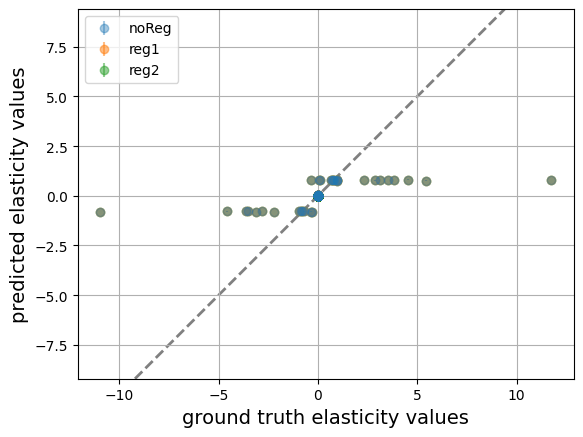

In [17]:
plt.axes().set_aspect('equal', 'datalim')

#plt.xlim((-5,5))
#plt.ylim((-4,4))

plt.errorbar(gt_1, ela_df_1['median'], yerr=errors_1, alpha=0.4, fmt='o', label='noReg', zorder=100)
plt.errorbar(gt_1, ela_df_2['median'], yerr=errors_2, alpha=0.5, fmt='o', label='reg1', zorder=50)
plt.errorbar(gt_1, ela_df_3['median'], yerr=errors_3, alpha=0.5, fmt='o', label='reg2', zorder=20)
# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth elasticity values', size=14)
plt.ylabel('predicted elasticity values', size=14)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedElasticities.svg', format="svg")

### graphing the elasticity errors

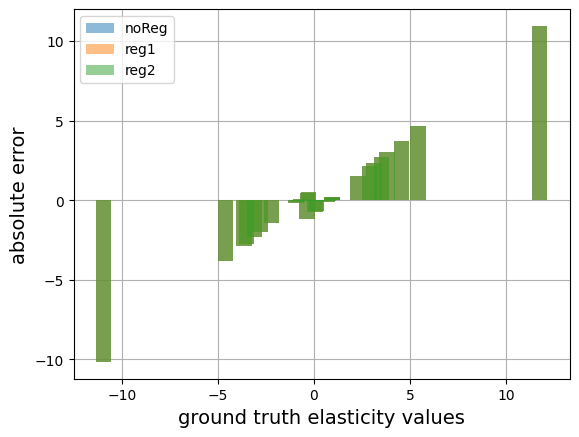

In [18]:
plt.grid()

plt.bar(gt_1,gt_1-ela_df_1['median'], alpha=0.5, label='noReg', zorder=200)
plt.bar(gt_1,gt_1-ela_df_2['median'], alpha=0.5, label='reg1', zorder=200)
plt.bar(gt_1,gt_1-ela_df_3['median'], alpha=0.5, label='reg2', zorder=200)

plt.xlabel('ground truth elasticity values', size=14)
plt.ylabel('absolute error', size=14)

plt.legend(loc="upper left")

## Calculating control coefficients

In [19]:
Ex05_prior_1= util.get_az_summary(util.run_prior_predictive(BMCA_obj05_1)['prior']['Ex'])
Ex15_prior_1= util.get_az_summary(util.run_prior_predictive(BMCA_obj15_1)['prior']['Ex'])
Ex3_prior_1= util.get_az_summary(util.run_prior_predictive(BMCA_obj3_1)['prior']['Ex'])
Ex5_prior_1= util.get_az_summary(util.run_prior_predictive(BMCA_obj5_1)['prior']['Ex'])

Ex05_prior_2= util.get_az_summary(util.run_prior_predictive(BMCA_obj05_2)['prior']['Ex'])
Ex15_prior_2= util.get_az_summary(util.run_prior_predictive(BMCA_obj15_2)['prior']['Ex'])
Ex3_prior_2= util.get_az_summary(util.run_prior_predictive(BMCA_obj3_2)['prior']['Ex'])
Ex5_prior_2= util.get_az_summary(util.run_prior_predictive(BMCA_obj5_2)['prior']['Ex'])

Ex05_prior_3= util.get_az_summary(util.run_prior_predictive(BMCA_obj05_3)['prior']['Ex'])
Ex15_prior_3= util.get_az_summary(util.run_prior_predictive(BMCA_obj15_3)['prior']['Ex'])
Ex3_prior_3= util.get_az_summary(util.run_prior_predictive(BMCA_obj3_3)['prior']['Ex'])
Ex5_prior_3= util.get_az_summary(util.run_prior_predictive(BMCA_obj5_3)['prior']['Ex'])


Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries

## Calculating CCC values and making graphs

In [24]:
gtCCC = pd.DataFrame(rr_1.getScaledConcentrationControlCoefficientMatrix(), index=rr_1.getFloatingSpeciesIds(), columns=rr_1.getReactionIds())

### priors

In [29]:
priorCCC05 = util.estimate_CCCs(BMCA_obj05, Ex05_prior_1.reshape((19,-1)))
priorCCC15 = util.estimate_CCCs(BMCA_obj15, Ex15_prior_1.reshape((19,-1)))
priorCCC3 = util.estimate_CCCs(BMCA_obj3, Ex3_prior_1.reshape((19,-1)))
priorCCC5 = util.estimate_CCCs(BMCA_obj5, Ex5_prior_1.reshape((19,-1)))

In [30]:
priorCCCs = [priorCCC05, priorCCC15, priorCCC3, priorCCC5]

In [31]:
priorCCC_1_meds = [-pd.DataFrame(np.median(priorCCC, axis=0), columns=rr_1.getReactionIds(), index=rr_1.getFloatingSpeciesIds()) for priorCCC in priorCCCs]
priorCCC_1_meds = pd.concat([i.melt()['value'] for i in priorCCC_1_meds], axis=1).values
priorCCC_1_meds = pd.DataFrame(priorCCC_1_meds, columns=pt_labels)
priorCCC_1_meds['median'] = priorCCC_1_meds.median(axis=1)
priorCCC_1_meds['min'] = priorCCC_1_meds.min(axis=1)
priorCCC_1_meds['max'] = priorCCC_1_meds.max(axis=1)
# priorCCC_1_meds

In [32]:
CCC_lower_y_1_prior = np.array(priorCCC_1_meds['median']) - np.array(priorCCC_1_meds['min'])
CCC_upper_y_1_prior = np.array(priorCCC_1_meds['max']) - np.array(priorCCC_1_meds['median'])
CCC_errors_1_prior = [CCC_lower_y_1_prior, CCC_upper_y_1_prior]

### posteriors

In [34]:
# all data
postCCC05_1 = util.estimate_CCCs(BMCA_obj05, Ex05_1.reshape((19,-1)))
postCCC15_1 = util.estimate_CCCs(BMCA_obj15, Ex15_1.reshape((19,-1)))
postCCC3_1 = util.estimate_CCCs(BMCA_obj3, Ex3_1.reshape((19,-1)))
postCCC5_1 = util.estimate_CCCs(BMCA_obj5, Ex5_1.reshape((19,-1)))

In [35]:
postCCCs_1 = [postCCC05_1, postCCC15_1, postCCC3_1, postCCC5_1]

In [36]:
postCCC_1_meds = [-pd.DataFrame(np.median(postCCC, axis=0), columns=rr_1.getReactionIds(), index=rr_1.getFloatingSpeciesIds()) for postCCC in postCCCs_1]
postCCC_1_meds = pd.concat([i.melt()['value'] for i in postCCC_1_meds], axis=1).values
postCCC_1_meds = pd.DataFrame(postCCC_1_meds, columns=pt_labels)
postCCC_1_meds['median'] = postCCC_1_meds.median(axis=1)
postCCC_1_meds['min'] = postCCC_1_meds.min(axis=1)
postCCC_1_meds['max'] = postCCC_1_meds.max(axis=1)
# postCCC_1_meds

In [37]:
CCC_lower_y_1_post = np.array(postCCC_1_meds['median']) - np.array(postCCC_1_meds['min'])
CCC_upper_y_1_post = np.array(postCCC_1_meds['max']) - np.array(postCCC_1_meds['median'])
CCC_errors_1_post = [CCC_lower_y_1_post, CCC_upper_y_1_post]

### graphs

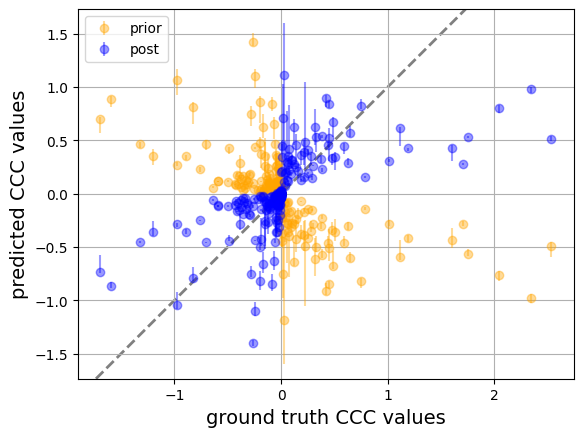

In [39]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtCCC.melt()['value'], priorCCC_1_meds['median'], yerr=CCC_errors_1_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtCCC.melt()['value'], postCCC_1_meds['median'], yerr=CCC_errors_1_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth CCC values', size=14)
plt.ylabel('predicted CCC values', size=14)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianCCCs_1.svg', format="svg")

## Calculating FCC values and making graphs

In [40]:
gtFCC_1 = pd.DataFrame(rr_1.getScaledFluxControlCoefficientMatrix(), index=rr_1.getReactionIds(), columns=rr_1.getReactionIds())

### priors

In [45]:
Ex05_prior_1= util.get_az_summary(util.run_prior_predictive(BMCA_obj05_1)['prior']['Ex'])
Ex15_prior_1= util.get_az_summary(util.run_prior_predictive(BMCA_obj15_1)['prior']['Ex'])
Ex3_prior_1= util.get_az_summary(util.run_prior_predictive(BMCA_obj3_1)['prior']['Ex'])
Ex5_prior_1= util.get_az_summary(util.run_prior_predictive(BMCA_obj5_1)['prior']['Ex'])


Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


In [46]:
priorFCC05_1 = util.estimate_FCCs(BMCA_obj05, Ex05_prior_1.reshape((19,13)))
priorFCC15_1 = util.estimate_FCCs(BMCA_obj15, Ex15_prior_1.reshape((19,13)))
priorFCC3_1 = util.estimate_FCCs(BMCA_obj3, Ex3_prior_1.reshape((19,13)))
priorFCC5_1 = util.estimate_FCCs(BMCA_obj5, Ex5_prior_1.reshape((19,13)))


In [47]:
priorFCCs_1 = [priorFCC05_1, priorFCC15_1, priorFCC3_1, priorFCC5_1]

In [48]:
priorFCC_1_meds = [-pd.DataFrame(np.median(priorFCC, axis=0), columns=rr_1.getReactionIds(), index=rr_1.getReactionIds()) for priorFCC in priorFCCs_1]
priorFCC_1_meds = pd.concat([i.melt()['value'] for i in priorFCC_1_meds], axis=1).values
priorFCC_1_meds = pd.DataFrame(priorFCC_1_meds, columns=pt_labels)
priorFCC_1_meds['median'] = priorFCC_1_meds.median(axis=1)
priorFCC_1_meds['min'] = priorFCC_1_meds.min(axis=1)
priorFCC_1_meds['max'] = priorFCC_1_meds.max(axis=1)
# priorFCC_1_meds

In [50]:
FCC_lower_y_1_prior = np.array(priorFCC_1_meds['median']) - np.array(priorFCC_1_meds['min'])
FCC_upper_y_1_prior = np.array(priorFCC_1_meds['max']) - np.array(priorFCC_1_meds['median'])
FCC_errors_1_prior = [FCC_lower_y_1_prior, FCC_upper_y_1_prior]


### posteriors

In [52]:
# all data
postFCC05_1 = util.estimate_FCCs(BMCA_obj05, Ex05_1.reshape((19,13)))
postFCC15_1 = util.estimate_FCCs(BMCA_obj15, Ex15_1.reshape((19,13)))
postFCC3_1 = util.estimate_FCCs(BMCA_obj3, Ex3_1.reshape((19,13)))
postFCC5_1 = util.estimate_FCCs(BMCA_obj5, Ex5_1.reshape((19,13)))


In [53]:
postFCCs_1 = [postFCC05_1, postFCC15_1, postFCC3_1, postFCC5_1]

In [54]:
postFCC_1_meds = [-pd.DataFrame(np.median(postFCC, axis=0), columns=rr_1.getReactionIds(), index=rr_1.getReactionIds()) for postFCC in postFCCs_1]
postFCC_1_meds = pd.concat([i.melt()['value'] for i in postFCC_1_meds], axis=1).values
postFCC_1_meds = pd.DataFrame(postFCC_1_meds, columns=pt_labels)
postFCC_1_meds['median'] = postFCC_1_meds.median(axis=1)
postFCC_1_meds['min'] = postFCC_1_meds.min(axis=1)
postFCC_1_meds['max'] = postFCC_1_meds.max(axis=1)
# postFCC_1_meds

In [55]:
FCC_lower_y_1_post = np.array(postFCC_1_meds['median']) - np.array(postFCC_1_meds['min'])
FCC_upper_y_1_post = np.array(postFCC_1_meds['max']) - np.array(postFCC_1_meds['median'])
FCC_errors_1_post = [FCC_lower_y_1_post, FCC_upper_y_1_post]

### graphs

Text(0, 0.5, 'predicted FCC values')

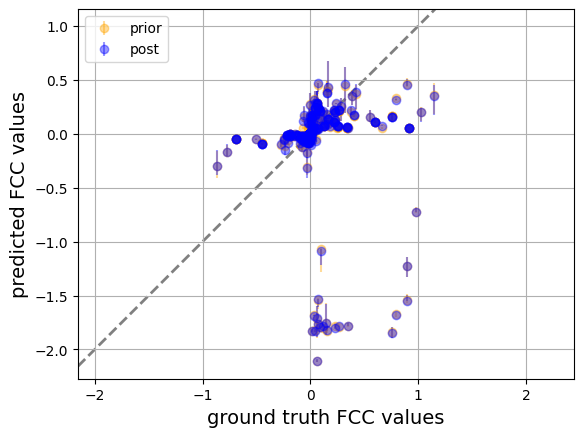

In [56]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC_1.melt()['value'], priorFCC_1_meds['median'], yerr=FCC_errors_1_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC_1.melt()['value'], postFCC_1_meds['median'], yerr=FCC_errors_1_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)
# plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_1.svg', format="svg")

### adding corrections for where the enzyme perturbed is directly involved in the reaction

In [57]:
rxn = np.repeat(rr_1.getReactionIds(),len(rr_1.getReactionIds()))
enz_pt = rr_1.getReactionIds() * len(rr_1.getReactionIds())
FCC_idx = pd.DataFrame([rxn, enz_pt]).T

In [58]:
for i in np.where(abs(gtFCC_1.melt()['value']- postFCC_1_meds['median'])>1):
    print(FCC_idx.iloc[i])
pt_enz_is_rxn = list(np.where(abs(gtFCC_1.melt()['value']- postFCC_1_meds['median'])>1)[0])

       0    1
0     v1   v1
20    v2   v2
40    v3   v3
60    v4   v4
80    v5   v5
100   v6   v6
120   v7   v7
140   v8   v8
160   v9   v9
180  v10  v10
200  v11  v11
220  v12  v12
240  v13  v13
260  v14  v14
280  v15  v15
300  v16  v16
320  v17  v17
340  v18  v18
341  v18  v19
360  v19  v19


### graphing the corrected FCC dfs

In [59]:
priorFCC_1_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_1_meds.loc[pt_enz_is_rxn, 'median'] += 2

Text(0, 0.5, 'predicted FCC values')

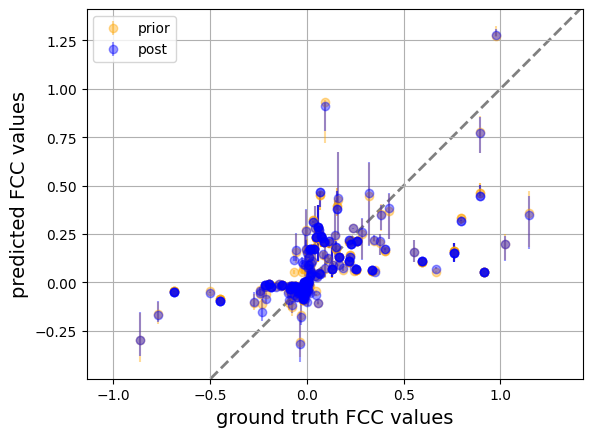

In [60]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC_1.melt()['value'], priorFCC_1_meds['median'], yerr=FCC_errors_1_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC_1.melt()['value'], postFCC_1_meds['median'], yerr=FCC_errors_1_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)
# plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_1_wCorrection.svg', format="svg")

### Graphing the absolute error

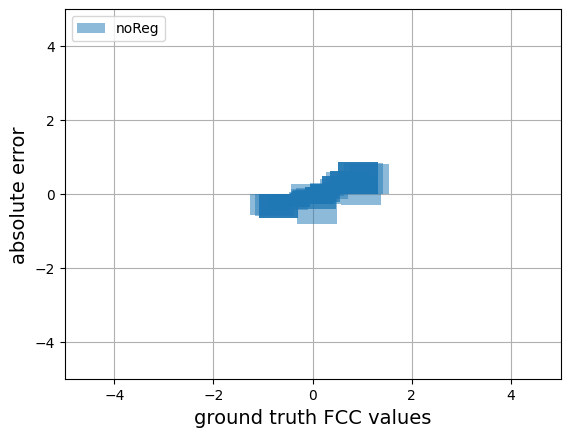

In [62]:
# FCCs need to be corrected before running this cell

plt.grid()
plt.xlim((-5,5))
plt.ylim((-5,5))

plt.bar(gtFCC_1.melt()['value'], gtFCC_1.melt()['value']-postFCC_1_meds['median'], alpha=0.5, label='noReg', zorder=200)

plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('absolute error', size=14)

plt.legend(loc="upper left")
# plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-absError_byAllostery.svg', format="svg")

## Evaluating FCC ranking

In [65]:
def calculate_FCC_med_ranking_df(postFCC,  r):
    postFCC_med=pd.DataFrame(np.median(postFCC, axis=0), columns=r.getReactionIds(), index=r.getReactionIds()).abs()
    m1 = postFCC_med.index.values[:, None] == postFCC_med.columns.values
    postFCC = pd.DataFrame(np.select([m1], [float('Nan')], postFCC_med), columns=postFCC_med.columns, index=postFCC_med.index)
    postFCC_rankings= postFCC.rank(axis=1, ascending=False, na_option='keep')

    return postFCC_rankings


### heatmap of how far FCC rank predictions are from ground truth FCC ranks.

In [66]:
gt_1_FCC=pd.DataFrame(rr_1.getScaledFluxControlCoefficientMatrix(), columns=rr_1.getReactionIds(), index=rr_1.getReactionIds()).abs()
m1 = gt_1_FCC.index.values[:, None] == gt_1_FCC.columns.values
gt_1_FCC = pd.DataFrame(np.select([m1], [float('Nan')], gt_1_FCC), columns=gt_1_FCC.columns, index=gt_1_FCC.index)
gtFCC_1_rankings= gt_1_FCC.rank(axis=1, ascending=False, na_option='keep')
# fruit
a = gtFCC_1_rankings.loc['v19']

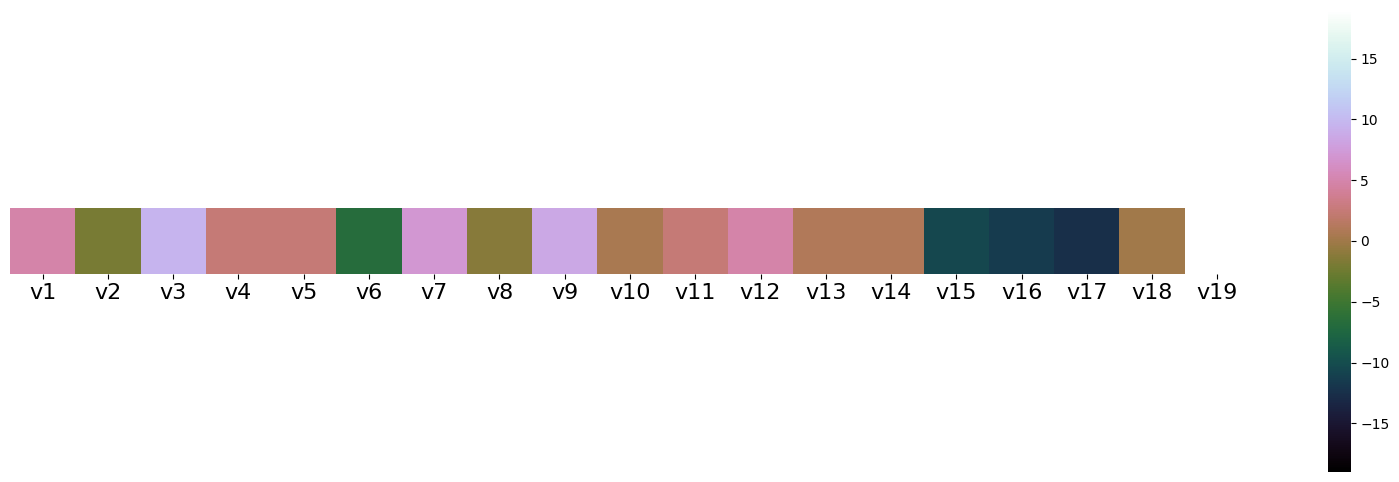

In [67]:
ranking_dfs = []
for i in postFCCs_1: 
    ranking_dfs.append(calculate_FCC_med_ranking_df(i, rr_1))

df_concat = pd.concat(ranking_dfs)
by_row_index = df_concat.groupby(df_concat.index, sort=False)
post_df_means = by_row_index.mean()

delta_df_means = post_df_means-gtFCC_1_rankings

# what are the labels? are they the ground truth rankings? 
plt.figure(figsize=(20, 6))
# sns.heatmap(pd.DataFrame(delta_df_means.loc['v_ACE_OUT']).T, square=True, cmap='coolwarm', vmin=-60, vmax=60)
sns.heatmap(pd.DataFrame(delta_df_means.loc['v19']).T, square=True, cmap='cubehelix', vmin=-19, vmax=19)
_ = plt.yticks(ticks=[], labels=[])
_ = plt.xticks(size=16)

# plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedElasticities_zoom.svg', format="svg")

## Quantifying the number of FCCs in top ten that were predicted correctly by BMCA


In [47]:
rank_counts_df = pd.read_csv('../data/results/TopologyB_top10.csv')
rank_counts_df

In [ ]:
stagbar_counts = rank_counts_df.pivot_table(index=['omittedData','type'], aggfunc=['mean',np.std])
stagbar_counts.reset_index(inplace=True)
stagbar_counts = stagbar_counts.reindex([1,0,7,6,3,2,9,8,5,4])
stagbar_counts

In [ ]:
ax = plt.subplot(111)
ax.grid()

ax.bar([i-0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values,
        width=0.2, color='orange', align='center', zorder=100, label='prior')
plt.errorbar([i-0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='prior']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

ax.bar([i+0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values,
        width=0.2, color='tab:blue', align='center', zorder=100, label='post')
plt.errorbar([i+0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='post']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

_ = ax.set_xticklabels([0, 'None', 'Fluxes', 'Enzymes', 'Int. Met.', 'Ex. Met.'])
_ = ax.set_yticks(range(0,12,2))
ax.legend()
# plt.savefig(f'../data/results/raw_svg_figures/top{topology}_rankCounts.svg', format='svg')

## Visualizing Spearman data 

### Condense Spearman data

In [125]:
os.chdir(f'../data/results/spearman_coefficients/topology{topology}/')

In [ ]:
spr_file_list = [i for i in os.listdir()]

spr_dfs = []
for file in spr_file_list:
    a = pd.read_csv(file)

    reg = file.split('-')[1].split('_')[0]
    omit = file.split('_')[1]

    a['reg'] = [reg]*len(a)
    a['omit'] = [omit]*len(a)
    spr_dfs.append(a)

all_spr_df_B = pd.concat(spr_dfs)
all_spr_df_B

In [127]:
os.chdir('../../../../notebooks/')

In [128]:
all_spr_df_B.rename(columns={'Unnamed: 0':'perturbation'}, inplace=True)
all_spr_df_B['distr'] = [(i.split('-')[1]) for i in all_spr_df_B['perturbation']]
all_spr_df_B['perturbation'] = [float(i.split('x')[0]) for i in all_spr_df_B['perturbation']]

In [ ]:
all_spr_df_B = all_spr_df_B[all_spr_df_B['perturbation'] != 1.01]
all_spr_df_B

In [ ]:
a = pd.pivot_table(all_spr_df_B, values=['r'], index=['omit', 'distr'], aggfunc=['mean', 'std'], sort=False)
a.reset_index(inplace=True)
a = a.reindex([0,1,6,7,2,3,8,9,4,5])
a

### Graph of aggregated Spearman corr

In [ ]:
# plot
ax = plt.subplot(111)
ax.grid()

ax.bar([i-0.1 for i in range(5)], a[a['distr']=='prior']['mean'].squeeze(), width=0.2, color='tab:blue', align='center', zorder=100, label='prior')
ax.bar([i+0.1 for i in range(5)], a[a['distr']=='post']['mean'].squeeze(), width=0.2, color='tab:orange', align='center', zorder=100, label='posterior')

## add error bars
plt.errorbar([i-0.1 for i in range(5)], a[a['distr']=='prior']['mean'].squeeze(), 
             yerr=a[a['distr']=='prior']['std'].squeeze(), 
             color='black', capsize=3, zorder=1000, ls='none')

plt.errorbar([i+0.1 for i in range(5)], a[a['distr']=='post']['mean'].squeeze(), 
             yerr=a[a['distr']=='post']['std'].squeeze(), 
             color='black', capsize=3, zorder=1000, ls='none')

ax.set_xticks([-0.5]+list(np.arange(0,5)))
_ = ax.set_xticklabels(['', 'All Data', "Fluxes", 'Enzymes', "Int. Met.", "Ex. Met."], size=14) ## fix the labels
_ = ax.set_yticks(np.arange(0,1,0.05))

ax.legend()#plt.ylabel('Spearman correlation coefficient ($r$)', size=14)

# plt.savefig(f'../data/results/raw_svg_figures/Top{topology}_sprCorr.svg', format='svg' )